In [196]:
import time
import re
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
browser = webdriver.Chrome(executable_path='C:/chromedriver_win32/chromedriver.exe')
browser.get('https://fundresearch.fidelity.com/mutual-funds/ira-fund-families')
link_name, fund_name, rating, returns, expenses, risk, url = ([] for _ in range(7))
timeout = 5

In [197]:
num_columns = len(browser.find_element_by_css_selector('#contentContainer > div.layout-pricing-fund-region > div.test-eligible-fund-list').get_property('children'))-1
for ci in range(2,num_columns):
    column = browser.find_element_by_css_selector('#contentContainer > div.layout-pricing-fund-region > div.test-eligible-fund-list').get_property('children')[ci]
    num_links = len(column.get_property('children')[0].get_property('children'))
    for li in range(36, num_links):
        column = browser.find_element_by_css_selector('#contentContainer > div.layout-pricing-fund-region > div.test-eligible-fund-list').get_property('children')[ci]
        link = column.get_property('children')[0].get_property('children')[li].get_property('children')[0]
        cur_link_name = link.text
        link.click()
        try:
            css_selector = '#contentContainer > div.layout-pricing-fund-region > div.test-eligible-fund-list'
            element_present = EC.presence_of_element_located((By.CSS_SELECTOR, css_selector))
            WebDriverWait(browser, timeout).until(element_present)
        except:
            browser.back()
            time.sleep(.5)
            continue
        tmp = browser.find_element_by_css_selector(css_selector)
        num_fund_columns = len(tmp.get_property('children'))-1
        for fci in range(num_fund_columns):
            css_selector = '#contentContainer > div.layout-pricing-fund-region > div.test-eligible-fund-list'
            fund = browser.find_element_by_css_selector(css_selector).get_property('children')[fci]
            num_fund_rows = len(fund.get_property('children')[0].get_property('children'))
            for fri in range(num_fund_rows):
                css_selector = '#contentContainer > div.layout-pricing-fund-region > div.test-eligible-fund-list'
                fund = browser.find_element_by_css_selector(css_selector).get_property('children')[fci]
                fund = fund.get_property('children')[0].get_property('children')[fri].get_property('children')[0]
                cur_fund_name = fund.text
                fund.click()
                try:
                    css_selector = '#morning-rating-1 > div.ratingImg-container > img'
                    element_present = EC.presence_of_element_located((By.CSS_SELECTOR, css_selector))
                    WebDriverWait(browser, timeout).until(element_present)
                except:
                    browser.back()
                    time.sleep(.5)
                    continue
                rating_elem = browser.find_element_by_css_selector(  '#morning-rating-1 > div.ratingImg-container > img')
                rating.append(int(rating_elem.get_attribute('title')[0]))
                returns_elem =  browser.find_element_by_css_selector('#morning-rating-2 > div.rating-container > div.ratingImg-container > img')
                returns.append(int(returns_elem.get_attribute('title')[0]))
                expenses_elem = browser.find_element_by_css_selector('#morning-rating-3 > div.rating-container > div.ratingImg-container > img')
                expenses.append(int(expenses_elem.get_attribute('title')[0]))
                risk_elem = browser.find_element_by_css_selector(    '#morning-rating-4 > div.rating-container > div.ratingImg-container > img')
                risk_string = risk_elem.get_attribute('title')
                risk.append(int(re.findall(r'[0-9][0-9]*',risk_string)[0]))
                fund_name.append(cur_fund_name)
                link_name.append(cur_link_name)
                print(cur_link_name + ' - ' + cur_fund_name)
                url.append(browser.current_url)
                browser.back()
                time.sleep(.5)
        browser.back()
        time.sleep(.5)
        
        

Wasatch - Wasatch Core Growth Fund
Wasatch - Wasatch Emerging India Fund Investor Class
Wasatch - Wasatch Emerging Markets Select Fund Investor Class Shares
Wasatch - Wasatch Frontier Emerging Small Countries Fund Investor Class Shares
Wasatch - Wasatch Global Opportunities Fund Investor Class
Wasatch - Wasatch International Growth Fund Investor Class
Wasatch - Wasatch International Opportunities Fund Investor Class
Wasatch - Wasatch Micro Cap Value Fund
Wasatch - Wasatch Small Cap Growth Fund Investor Class
Wasatch - Wasatch Small Cap Value Fund
Wasatch - Wasatch Ultra Growth Fund
Wasatch - Wasatch-Hoisington U.S. Treasury Fund
Weitz - Weitz Partners III Opportunity Fund Investor Class
Weitz - Weitz Short Duration Income Fund Investor Class
Weitz - Weitz Value Fund Investor Class
Wells Fargo - Wells Fargo C&B Large Cap Value Fund - Class Admin
Wells Fargo - Wells Fargo C&B Mid Cap Value Fund - Class Admin
Wells Fargo - Wells Fargo Capital Growth Fund - Class Admin
Wells Fargo - Wells 

In [186]:
url

['https://fundresearch.fidelity.com/mutual-funds/summary/00758M162',
 'https://fundresearch.fidelity.com/mutual-funds/summary/349903781',
 'https://fundresearch.fidelity.com/mutual-funds/summary/00688P103',
 'https://fundresearch.fidelity.com/mutual-funds/summary/00764F458',
 'https://fundresearch.fidelity.com/mutual-funds/summary/00764F441',
 'https://fundresearch.fidelity.com/mutual-funds/summary/00764F433',
 'https://fundresearch.fidelity.com/mutual-funds/summary/00771F301',
 'https://fundresearch.fidelity.com/mutual-funds/summary/742935117',
 'https://fundresearch.fidelity.com/mutual-funds/summary/66537Y587',
 'https://fundresearch.fidelity.com/mutual-funds/summary/66537X258',
 'https://fundresearch.fidelity.com/mutual-funds/summary/66538B677',
 'https://fundresearch.fidelity.com/mutual-funds/summary/022865307',
 'https://fundresearch.fidelity.com/mutual-funds/summary/024525818',
 'https://fundresearch.fidelity.com/mutual-funds/summary/024524118',
 'https://fundresearch.fidelity.co

In [161]:
import pandas as pd

In [162]:
data = pd.DataFrame({'link_name':link_name,'fund_name':fund_name,'rating':rating,'returns':returns,'expenses':expenses,'risk':risk})

ValueError: arrays must all be same length

In [211]:
[len(link_name), len(fund_name), len(rating), len(returns), len(expenses), len(risk), len(url)]

[659, 61, 61, 61, 61, 61, 61]

In [193]:
link_name_pre, fund_name_pre, rating_pre, returns_pre, expenses_pre, risk_pre, url_pre = \
(link_name,     fund_name,     rating,     returns,     expenses,      risk,     url)

In [208]:
link_name_post, fund_name_post, rating_post, returns_post, expenses_post, risk_post, url_post = \
(link_name[8:], fund_name[8:],  rating[8:],  returns[8:],  expenses[8:],  risk[8:],  url[8:])

In [212]:
link_name = link_name_pre + link_name_post
fund_name = fund_name_pre + fund_name_post
rating = rating_pre + rating_post
returns = returns_pre + returns_post
expenses = expenses_pre + expenses_post
risk = risk_pre + risk_post
url = url_pre + url_post

In [209]:
fund_name_post[:3]

['Wasatch Small Cap Growth Fund Investor Class',
 'Wasatch Small Cap Value Fund',
 'Wasatch Ultra Growth Fund']

In [194]:
[len(link_name_pre), len(fund_name_pre), len(rating_pre), len(returns_pre), len(expenses_pre), len(risk_pre), len(url_pre)]

[606, 606, 606, 606, 606, 606, 606]

In [202]:
[link_name[i] + ' - ' + fund_name[i] for i in range(20)]

['Wasatch - Wasatch Core Growth Fund',
 'Wasatch - Wasatch Emerging India Fund Investor Class',
 'Wasatch - Wasatch Emerging Markets Select Fund Investor Class Shares',
 'Wasatch - Wasatch Frontier Emerging Small Countries Fund Investor Class Shares',
 'Wasatch - Wasatch Global Opportunities Fund Investor Class',
 'Wasatch - Wasatch International Growth Fund Investor Class',
 'Wasatch - Wasatch International Opportunities Fund Investor Class',
 'Wasatch - Wasatch Micro Cap Value Fund',
 'Wasatch - Wasatch Small Cap Growth Fund Investor Class',
 'Wasatch - Wasatch Small Cap Value Fund',
 'Wasatch - Wasatch Ultra Growth Fund',
 'Wasatch - Wasatch-Hoisington U.S. Treasury Fund',
 'Weitz - Weitz Partners III Opportunity Fund Investor Class',
 'Weitz - Weitz Short Duration Income Fund Investor Class',
 'Weitz - Weitz Value Fund Investor Class',
 'Wells Fargo - Wells Fargo C&B Large Cap Value Fund - Class Admin',
 'Wells Fargo - Wells Fargo C&B Mid Cap Value Fund - Class Admin',
 'Wells Farg

In [203]:
[link_name_pre[-i] + ' - ' + fund_name_pre[-i] for i in range(1,20)]

['Wasatch - Wasatch Micro Cap Value Fund',
 'Wasatch - Wasatch International Opportunities Fund Investor Class',
 'Wasatch - Wasatch International Growth Fund Investor Class',
 'Wasatch - Wasatch Global Opportunities Fund Investor Class',
 'Wasatch - Wasatch Frontier Emerging Small Countries Fund Investor Class Shares',
 'Wasatch - Wasatch Emerging Markets Select Fund Investor Class Shares',
 'Wasatch - Wasatch Emerging India Fund Investor Class',
 'Wasatch - Wasatch Core Growth Fund',
 'Vulcan Fund - Vulcan Value Partners Small Cap Fund',
 'Vulcan Fund - Vulcan Value Partners Fund',
 'Value Line - Value Line Small Cap Opportunities Fund Investor Class',
 'Value Line - Value Line Premier Growth Fund',
 'Value Line - Value Line Mid Cap Focused Fund',
 'Value Line - Value Line Larger Companies Focused Fund Investor Class',
 'Value Line - Value Line Core Bond Fund',
 'Value Line - Value Line Capital Appreciation Fund, Inc. Investor Class',
 'Value Line - Value Line Asset Allocation Fund I

In [167]:
bad_ind = []
for i in range(len(fund_name)):
    if fund_name[i] == '':
        bad_ind.append(i)

In [168]:
bad_ind

[7, 48, 88, 136, 176, 410, 451]

In [169]:
bad_ind2 = []
for i in range(len(link_name)):
    if link_name[i] == '':
        bad_ind2.append(i)

In [170]:
bad_ind2

[58]

In [215]:
data = pd.DataFrame({'company_name':link_name,'fund_name':fund_name,'rating':rating,'returns':returns,'expenses':expenses,'risk':risk,'url':url})

In [226]:
data.to_pickle('list_of_funds.pkl')

In [172]:
import seaborn as sb

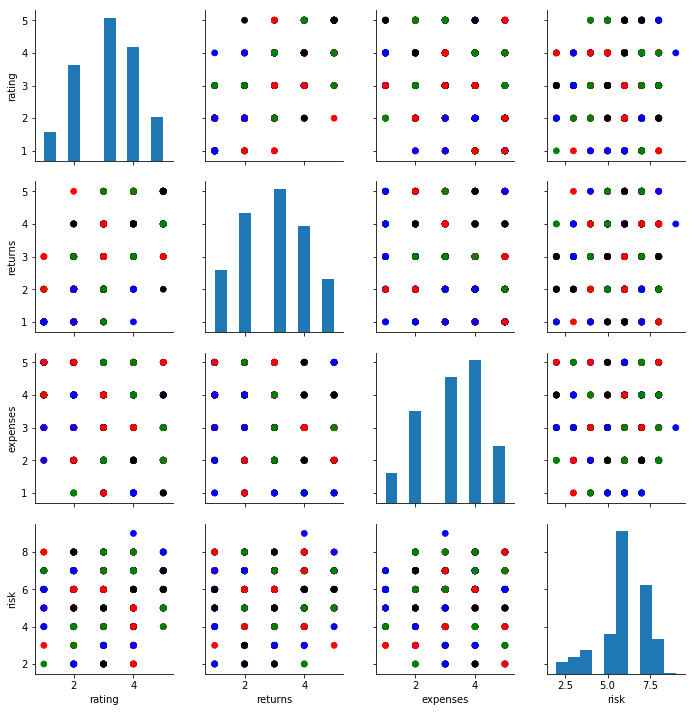

In [174]:
sb.pairplot(data=data, vars=['rating','returns','expenses','risk'], plot_kws=dict(edgecolor=['b','k','r','g'], facecolor=['b','k','r','g'] ) )

In [216]:
data.head()

,company_name,fund_name,rating,returns,expenses,risk,url
0,Acadian Funds,Acadian Emerging Markets Portfolio Investor Class,3,3,4,8,https://fundresearch.fidelity.com/mutual-funds...
1,Adalta,Adalta International Fund,1,1,4,7,https://fundresearch.fidelity.com/mutual-funds...
2,Adirondack,Adirondack Small Cap Fund,3,2,3,7,https://fundresearch.fidelity.com/mutual-funds...
3,Advisorone,AdvisorOne CLS Flexible Income Fund Class N,3,4,5,3,https://fundresearch.fidelity.com/mutual-funds...
4,Advisorone,AdvisorOne CLS Global Aggressive Equity Fund C...,3,4,5,6,https://fundresearch.fidelity.com/mutual-funds...


In [253]:
sorted_data = data.sort_values(by = ['returns', 'expenses','rating', 'risk'], ascending=[False, True, False, True])

In [254]:
sorted_data.iloc[1:20]

,company_name,fund_name,rating,returns,expenses,risk,url
233,Fidelity Investments,Fidelity Puritan Fund,5,5,1,5,https://fundresearch.fidelity.com/mutual-funds...
539,Sextant Funds,Sextant Global High Income Fund,4,5,1,5,https://fundresearch.fidelity.com/mutual-funds...
120,Dreyfus,Dreyfus Small Cap Stock Index Fund Investor Sh...,4,5,1,7,https://fundresearch.fidelity.com/mutual-funds...
173,Fidelity Investments,Fidelity Focused Stock Fund,3,5,1,6,https://fundresearch.fidelity.com/mutual-funds...
385,Janus No Load,Janus Henderson Balanced Fund Class T,5,5,2,5,https://fundresearch.fidelity.com/mutual-funds...
5,Advisorone,AdvisorOne CLS Shelter Fund Class N,5,5,2,6,https://fundresearch.fidelity.com/mutual-funds...
150,Fidelity Investments,Fidelity Blue Chip Growth Fund,5,5,2,6,https://fundresearch.fidelity.com/mutual-funds...
248,Fidelity Investments,Fidelity Select Defense and Aerospace Portfolio,5,5,2,7,https://fundresearch.fidelity.com/mutual-funds...
255,Fidelity Investments,Fidelity Select Health Care Services Portfolio,5,5,2,7,https://fundresearch.fidelity.com/mutual-funds...
261,Fidelity Investments,Fidelity Select Medical Technology and Devices...,5,5,2,7,https://fundresearch.fidelity.com/mutual-funds...


In [246]:
data.where(data.expenses<3).iloc[1:100]

,company_name,fund_name,rating,returns,expenses,risk,url
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Advisorone,AdvisorOne CLS Shelter Fund Class N,5.0,5.0,2.0,6.0,https://fundresearch.fidelity.com/mutual-funds...
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
browser = webdriver.Chrome(executable_path='C:/chromedriver_win32/chromedriver.exe')
urls = data.url.values
fund_symbol = []
for i in range(len(urls)):
    url = urls[i]
    browser.get(url)
    try:
        css_selector = '#search-box'
        element_present = EC.presence_of_element_located((By.CSS_SELECTOR, css_selector))
        WebDriverWait(browser, timeout).until(element_present)
    except:
        print(f"skipped: {i}, {url}")
        continue
    fund_symbol.append(browser.find_element_by_css_selector(css_selector).get_property('value'))

In [256]:
elem = browser.find_element_by_css_selector('#summary-card-container > div:nth-child(4) > div > hypo-10-k-template > div > div > div > hypothesis-chart > div > div.chart-body > div.chart-header > div.data-point-label.ng-scope > div.fmr-pwi-hypothesischart-datapoint-label.ng-scope.ng-isolate-scope.first > div.label-value > span.label.ng-binding.ng-scope')

In [257]:
elem.text

'AEMGX'

In [259]:
fund_symbol

['AEMGX', 'ADAQX', 'ADKSX', 'CLFLX', 'CLACX', 'CLSHX']

In [261]:
data.loc[1:10]

,company_name,fund_name,rating,returns,expenses,risk,url
1,Adalta,Adalta International Fund,1,1,4,7,https://fundresearch.fidelity.com/mutual-funds...
2,Adirondack,Adirondack Small Cap Fund,3,2,3,7,https://fundresearch.fidelity.com/mutual-funds...
3,Advisorone,AdvisorOne CLS Flexible Income Fund Class N,3,4,5,3,https://fundresearch.fidelity.com/mutual-funds...
4,Advisorone,AdvisorOne CLS Global Aggressive Equity Fund C...,3,4,5,6,https://fundresearch.fidelity.com/mutual-funds...
5,Advisorone,AdvisorOne CLS Shelter Fund Class N,5,5,2,6,https://fundresearch.fidelity.com/mutual-funds...
6,Advisors Preferred,OnTrack Core Fund Advisor Class,4,4,5,4,https://fundresearch.fidelity.com/mutual-funds...
7,Akre Funds,Akre Focus Fund Retail Class,4,5,4,6,https://fundresearch.fidelity.com/mutual-funds...
8,Altegris Funds,Altegris Futures Evolution Strategy Fund Class N,4,4,3,4,https://fundresearch.fidelity.com/mutual-funds...
9,Altegris Funds,Altegris Managed Futures Strategy Fund Class O,3,3,3,4,https://fundresearch.fidelity.com/mutual-funds...
10,Altegris Funds,Altegris/AACA Opportunistic Real Estate Fund N,5,5,5,8,https://fundresearch.fidelity.com/mutual-funds...


In [263]:
len(fund_symbol)

601

In [264]:
browser = webdriver.Chrome(executable_path='C:/chromedriver_win32/chromedriver.exe')
browser.get('https://fundresearch.fidelity.com/mutual-funds/summary/316448877')

In [265]:
elem = browser.find_element_by_css_selector('#search-box')

In [269]:
print(elem.get_property('value'))

FEXPX
